In [1]:
from spacepy import pycdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set()
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
import matplotlib
import matplotlib.colors as colors
from collections import Counter
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import math
from lmfit.models import GaussianModel
from sklearn import mixture
from sklearn.decomposition import PCA
from matplotlib.colors import LogNorm
import cdflib
from matplotlib import ticker, cm
import pandas as pd
from minisom import MiniSom

In [12]:
cdf_gsm = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_AUX_ECLAT_MAG_FLUX__20031023_081241_20031023_135211_V131120')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf_gsm, start=0):
    print(i, item, cdf_gsm[i])

0 time_tags__C4_CP_AUX_ECLAT_MAG_FLUX CDF_EPOCH [68]
1 Pdyn__C4_CP_AUX_ECLAT_MAG_FLUX CDF_FLOAT [68]
2 Pstat__C4_CP_AUX_ECLAT_MAG_FLUX CDF_FLOAT [68]
3 Em__C4_CP_AUX_ECLAT_MAG_FLUX CDF_FLOAT [68]
4 Bimf_z_gsm__C4_CP_AUX_ECLAT_MAG_FLUX CDF_FLOAT [68]
5 sc_r_xyz_gsm__C4_CP_AUX_ECLAT_MAG_FLUX CDF_FLOAT [68, 3]
6 B_vec_xyz_gsm__C4_CP_AUX_ECLAT_MAG_FLUX CDF_FLOAT [68, 3]
7 dipole_tilt__C4_CP_AUX_ECLAT_MAG_FLUX CDF_FLOAT [68]
8 SYMH__C4_CP_AUX_ECLAT_MAG_FLUX CDF_FLOAT [68]
9 mag_flux1__C4_CP_AUX_ECLAT_MAG_FLUX CDF_FLOAT [68]
10 mag_flux2__C4_CP_AUX_ECLAT_MAG_FLUX CDF_FLOAT [68]
11 Quality_region__C4_CP_AUX_ECLAT_MAG_FLUX CDF_FLOAT [68]
12 Quality_x__C4_CP_AUX_ECLAT_MAG_FLUX CDF_INT4 [68]
13 Quality_y__C4_CP_AUX_ECLAT_MAG_FLUX CDF_INT4 [68]
14 Quality_z__C4_CP_AUX_ECLAT_MAG_FLUX CDF_INT4 [68]
15 Quality_symh__C4_CP_AUX_ECLAT_MAG_FLUX CDF_INT4 [68]
16 sc_r_xyz_gsm__C4_CP_AUX_ECLAT_MAG_FLUX_REPRESENTATION_1 CDF_CHAR*1 [3] NRV
17 sc_r_xyz_gsm__C4_CP_AUX_ECLAT_MAG_FLUX_LABEL_1 CDF_CHAR*12 [3] NRV

In [13]:
epoch_gsm = cdf_gsm[0][...]
pos_gsm = cdf_gsm[5][...] #R_E
pos_gsm

array([[-12.82,  11.46,  -6.45],
       [-12.83,  11.44,  -6.53],
       [-12.83,  11.43,  -6.61],
       [-12.82,  11.42,  -6.69],
       [-12.82,  11.41,  -6.77],
       [-12.82,  11.4 ,  -6.85],
       [-12.82,  11.38,  -6.93],
       [-12.82,  11.37,  -7.  ],
       [-12.82,  11.36,  -7.08],
       [-12.82,  11.27,  -7.28],
       [-12.82,  11.34,  -7.22],
       [-12.81,  11.32,  -7.3 ],
       [-12.81,  11.31,  -7.37],
       [-12.81,  11.3 ,  -7.44],
       [-12.8 ,  11.29,  -7.5 ],
       [-12.8 ,  11.28,  -7.57],
       [-12.8 ,  11.27,  -7.64],
       [-12.79,  11.26,  -7.7 ],
       [-12.79,  11.25,  -7.76],
       [-12.78,  11.24,  -7.83],
       [-12.78,  11.23,  -7.89],
       [-12.77,  11.24,  -7.93],
       [-12.77,  11.22,  -8.01],
       [-12.76,  11.21,  -8.06],
       [-12.75,  11.2 ,  -8.12],
       [-12.75,  11.2 ,  -8.18],
       [-12.74,  11.19,  -8.23],
       [-12.73,  11.18,  -8.28],
       [-12.73,  11.18,  -8.34],
       [-12.72,  11.17,  -8.39],
       [-1

# 2005-08-28 Outlier Event

In [2]:
cdf = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_FGM_SPIN__20050828_161837_20050828_180027_V140305')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf, start=0):
    print(i, item, cdf[i])

0 time_tags__C4_CP_FGM_SPIN CDF_EPOCH [1473]
1 half_interval__C4_CP_FGM_SPIN CDF_FLOAT [1473]
2 B_vec_xyz_gse__C4_CP_FGM_SPIN CDF_FLOAT [1473, 3]
3 B_mag__C4_CP_FGM_SPIN CDF_FLOAT [1473]
4 sc_pos_xyz_gse__C4_CP_FGM_SPIN CDF_FLOAT [1473, 3]
5 range__C4_CP_FGM_SPIN CDF_INT4 [1473]
6 tm__C4_CP_FGM_SPIN CDF_INT4 [1473]
7 B_vec_xyz_gse__C4_CP_FGM_SPIN_REPRESENTATION_1 CDF_CHAR*1 [3] NRV
8 B_vec_xyz_gse__C4_CP_FGM_SPIN_LABEL_1 CDF_CHAR*2 [3] NRV
9 sc_pos_xyz_gse__C4_CP_FGM_SPIN_REPRESENTATION_1 CDF_CHAR*1 [3] NRV
10 sc_pos_xyz_gse__C4_CP_FGM_SPIN_LABEL_1 CDF_CHAR*1 [3] NRV


In [3]:
epoch = cdf[0][...]
B_vec = cdf[2][...] #nT
B_mag = cdf[3][...] #nT
position = cdf[4][...] #km

In [4]:
df = pd.DataFrame({'Timestamp':epoch, 'B_mag':B_mag})

In [5]:
cdf1 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_CIS-CODIF_HS_H1_MOMENTS__20050828_161837_20050828_180027_V081210')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf1, start=0):
    print(i, item, cdf1[i])

0 time_tags__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_EPOCH [736]
1 duration__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [736]
2 density__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [736]
3 velocity__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [736, 3]
4 pressure__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [736, 3, 3]
5 T__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [736]
6 T_par__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [736]
7 T_perp__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [736]
8 velocity__C4_CP_CIS-CODIF_HS_H1_MOMENTS_REPRESENTATION_1 CDF_CHAR*1 [3] NRV
9 pressure__C4_CP_CIS-CODIF_HS_H1_MOMENTS_REPRESENTATION_1 CDF_CHAR*1 [3] NRV
10 pressure__C4_CP_CIS-CODIF_HS_H1_MOMENTS_REPRESENTATION_2 CDF_CHAR*1 [3] NRV
11 pressure__C4_CP_CIS-CODIF_HS_H1_MOMENTS_LABEL_1 CDF_CHAR*1 [3] NRV
12 pressure__C4_CP_CIS-CODIF_HS_H1_MOMENTS_LABEL_2 CDF_CHAR*1 [3] NRV


In [6]:
epoch1 = cdf1[0][...]
density1 = cdf1[2][...] #cm-3
vel1 = cdf1[3][...] #km/s
pressure1 = cdf1[4][...] #nPa
T1 = cdf1[5][...] #MK
T_par1 = cdf1[6][...] #MK
T_perp1 = cdf1[7][...] #MK
k_b = 1.38e-23 #m^2 kg s^-2 K^-1
mu_0 = 1.26e-6 #m kg s^-2 A^-2
vel_tot1 = np.sqrt((vel1[:,0]**2)+(vel1[:,1]**2)+vel1[:,2]**2)

In [7]:
df1 = pd.DataFrame({'Timestamp':epoch1, 'density':density1, 'T':T1})

In [8]:
# merge CIS and FGM data into one dataframe based on timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df_12 = pd.merge_asof(df1, df, on='Timestamp')
# calculate proton plasma beta
plasma_beta = (df_12['density']*(100**3)*k_b*df_12['T']*(10**6))/(((df_12['B_mag']*(10**-9))**2)/(2*mu_0))
df_12['plasma_beta'] = plasma_beta

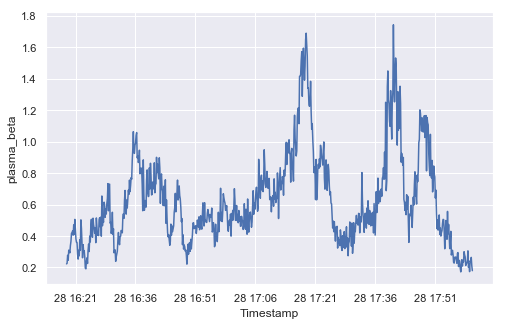

In [9]:
# plasma beta
plt.figure(figsize=(8,5))
sns.lineplot(x="Timestamp", y="plasma_beta", data=df_12)

In [2]:
# for i in range(len(plasma_beta)):
#     print(i,df_12['Timestamp'].iloc[i],df_12['plasma_beta'].iloc[i])

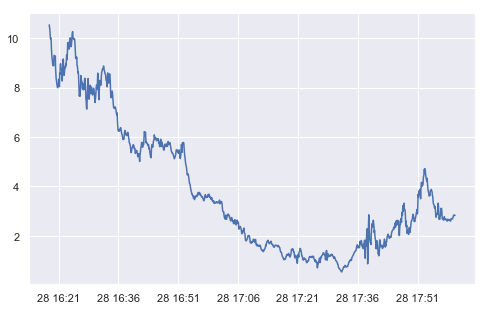

In [11]:
# plot IMF z-component against time
plt.figure(figsize=(8,5))
plt.plot(epoch,B_vec[:,2])

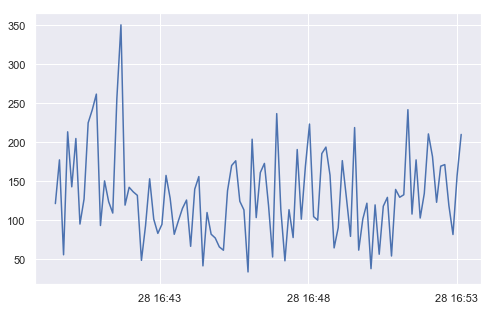

In [12]:
# plasma flow velocity from CIS
plt.figure(figsize=(8,5))
plt.plot(epoch1[150:250],vel_tot1[150:250])

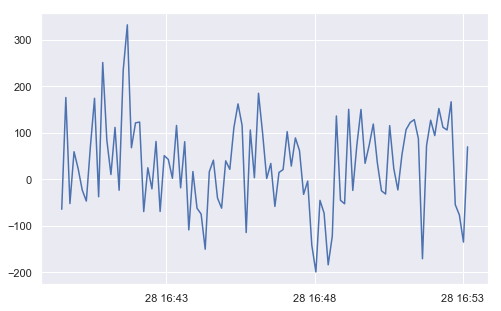

In [13]:
# plasma flow v_x from CIS
plt.figure(figsize=(8,5))
plt.plot(epoch1[150:250],vel1[150:250,0])

Text(0,0.5,'T_par/T_perp')

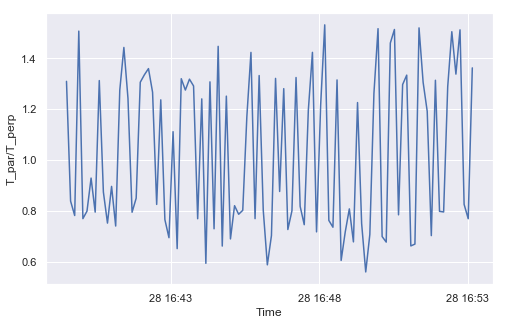

In [17]:
# cis temperature anisotropy
plt.figure(figsize=(8,5))
plt.plot(epoch1[150:250],T_par1[150:250]/T_perp1[150:250])
plt.xlabel('Time')
plt.ylabel('T_par/T_perp')

In [18]:
cdf2 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_MOMENTS__20050828_161837_20050828_180027_V190319')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf2, start=0):
    print(i, item, cdf2[i])

0 time_tags__C4_CP_PEA_MOMENTS CDF_EPOCH [435]
1 time_tags_DeltaLower__C4_CP_PEA_MOMENTS CDF_FLOAT [435]
2 time_tags_DeltaUpper__C4_CP_PEA_MOMENTS CDF_FLOAT [435]
3 Mode_Sensor__C4_CP_PEA_MOMENTS CDF_INT4 [435]
4 Mode_SweepMode_HEEA__C4_CP_PEA_MOMENTS CDF_INT4 [435]
5 Mode_Preset_HEEA__C4_CP_PEA_MOMENTS CDF_INT4 [435]
6 Mode_EnergyLevelRange_HEEA__C4_CP_PEA_MOMENTS CDF_INT4 [435, 2]
7 Mode_EnergyMaxMin_HEEA__C4_CP_PEA_MOMENTS CDF_FLOAT [435, 2]
8 Mode_MCPlevel_HEEA__C4_CP_PEA_MOMENTS CDF_INT4 [435]
9 Mode_DataOrigin_HEEA__C4_CP_PEA_MOMENTS CDF_INT4 [435]
10 Mode_SweepMode_LEEA__C4_CP_PEA_MOMENTS CDF_INT4 [435]
11 Mode_Preset_LEEA__C4_CP_PEA_MOMENTS CDF_INT4 [435]
12 Mode_EnergyLevelRange_LEEA__C4_CP_PEA_MOMENTS CDF_INT4 [435, 2]
13 Mode_EnergyMaxMin_LEEA__C4_CP_PEA_MOMENTS CDF_FLOAT [435, 2]
14 Mode_MCPlevel_LEEA__C4_CP_PEA_MOMENTS CDF_INT4 [435]
15 Mode_DataOrigin_LEEA__C4_CP_PEA_MOMENTS CDF_INT4 [435]
16 Mode_TopRegionSensor__C4_CP_PEA_MOMENTS CDF_INT4 [435]
17 Mode_OverlapRegionSens

In [19]:
epoch2 = cdf2[0][...]
density2 = cdf2[19][...] #cm-3
vel2 = cdf2[20][...] #km/s
pressure2 = cdf2[23][...] #nPa
heat_flux2 = cdf2[24][...] #microW/m^2
T_par2 = cdf2[25][...] #MK
T_perp2 = cdf2[26][...] #MK

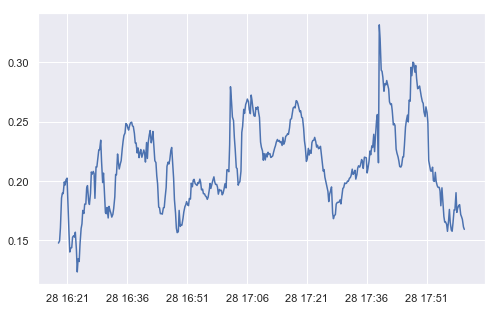

In [20]:
# electron density
plt.figure(figsize=(8,5))
plt.plot(epoch2,density2)

Text(0,0.5,'T_par/T_perp')

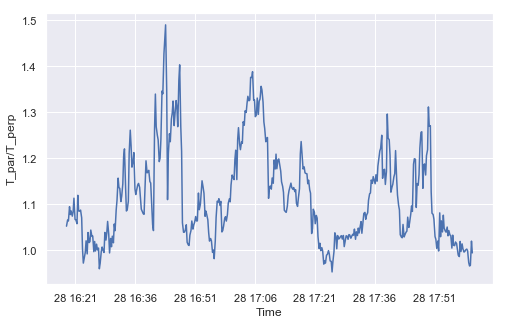

In [21]:
# electron temperature anisotropy
plt.figure(figsize=(8,5))
plt.plot(epoch2,T_par2/T_perp2)
plt.xlabel('Time')
plt.ylabel('T_par/T_perp')

In [3]:
# for i in range(len(epoch2)):
#     print(i,epoch2[i],T_par2[i]/T_perp2[i])

# 2003-10-13 Outlier Event

In [23]:
cdf3 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_FGM_SPIN__20031013_075830_20031013_113207_V140305')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf3, start=0):
    print(i, item, cdf3[i])

0 time_tags__C4_CP_FGM_SPIN CDF_EPOCH [3189]
1 half_interval__C4_CP_FGM_SPIN CDF_FLOAT [3189]
2 B_vec_xyz_gse__C4_CP_FGM_SPIN CDF_FLOAT [3189, 3]
3 B_mag__C4_CP_FGM_SPIN CDF_FLOAT [3189]
4 sc_pos_xyz_gse__C4_CP_FGM_SPIN CDF_FLOAT [3189, 3]
5 range__C4_CP_FGM_SPIN CDF_INT4 [3189]
6 tm__C4_CP_FGM_SPIN CDF_INT4 [3189]
7 B_vec_xyz_gse__C4_CP_FGM_SPIN_REPRESENTATION_1 CDF_CHAR*1 [3] NRV
8 B_vec_xyz_gse__C4_CP_FGM_SPIN_LABEL_1 CDF_CHAR*2 [3] NRV
9 sc_pos_xyz_gse__C4_CP_FGM_SPIN_REPRESENTATION_1 CDF_CHAR*1 [3] NRV
10 sc_pos_xyz_gse__C4_CP_FGM_SPIN_LABEL_1 CDF_CHAR*1 [3] NRV


In [24]:
epoch3 = cdf3[0][...]
B_vec3 = cdf3[2][...] #nT
B_mag3 = cdf3[3][...] #nT
position3 = cdf3[4][...] #km

In [25]:
df3 = pd.DataFrame({'Timestamp':epoch3, 'B_mag':B_mag3})

In [26]:
cdf4 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_CIS-CODIF_HS_H1_MOMENTS__20031013_075830_20031013_113207_V080213')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf4, start=0):
    print(i, item, cdf4[i])

0 time_tags__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_EPOCH [1596]
1 duration__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [1596]
2 density__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [1596]
3 velocity__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [1596, 3]
4 pressure__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [1596, 3, 3]
5 T__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [1596]
6 T_par__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [1596]
7 T_perp__C4_CP_CIS-CODIF_HS_H1_MOMENTS CDF_FLOAT [1596]
8 velocity__C4_CP_CIS-CODIF_HS_H1_MOMENTS_REPRESENTATION_1 CDF_CHAR*1 [3] NRV
9 pressure__C4_CP_CIS-CODIF_HS_H1_MOMENTS_REPRESENTATION_1 CDF_CHAR*1 [3] NRV
10 pressure__C4_CP_CIS-CODIF_HS_H1_MOMENTS_REPRESENTATION_2 CDF_CHAR*1 [3] NRV
11 pressure__C4_CP_CIS-CODIF_HS_H1_MOMENTS_LABEL_1 CDF_CHAR*1 [3] NRV
12 pressure__C4_CP_CIS-CODIF_HS_H1_MOMENTS_LABEL_2 CDF_CHAR*1 [3] NRV


In [27]:
epoch4 = cdf4[0][...]
density4 = cdf4[2][...] #cm-3
vel4 = cdf4[3][...] #km/s
pressure4 = cdf4[4][...] #nPa
T4 = cdf4[5][...] #MK
T_par4 = cdf4[6][...] #MK
T_perp4 = cdf4[7][...] #MK
k_b = 1.38e-23 #m^2 kg s^-2 K^-1
mu_0 = 1.26e-6 #m kg s^-2 A^-2
vel_tot4 = np.sqrt((vel4[:,0]**2)+(vel4[:,1]**2)+vel4[:,2]**2)

In [28]:
df4 = pd.DataFrame({'Timestamp':epoch4, 'density':density4, 'T':T4})

In [29]:
# merge CIS and FGM data into one dataframe based on timestamp
df3['Timestamp'] = pd.to_datetime(df3['Timestamp'])
df4['Timestamp'] = pd.to_datetime(df4['Timestamp'])
df_34 = pd.merge_asof(df4, df3, on='Timestamp')
# calculate proton plasma beta
plasma_beta34 = (df_34['density']*(100**3)*k_b*df_34['T']*(10**6))/(((df_34['B_mag']*(10**-9))**2)/(2*mu_0))
df_34['plasma_beta'] = plasma_beta34

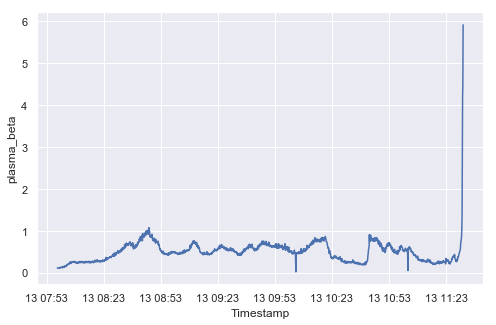

In [30]:
# plasma beta
plt.figure(figsize=(8,5))
sns.lineplot(x="Timestamp", y="plasma_beta", data=df_34)

In [4]:
# for i in range(len(plasma_beta34)):
#     print(i,df_34['Timestamp'].iloc[i],df_34['plasma_beta'].iloc[i])

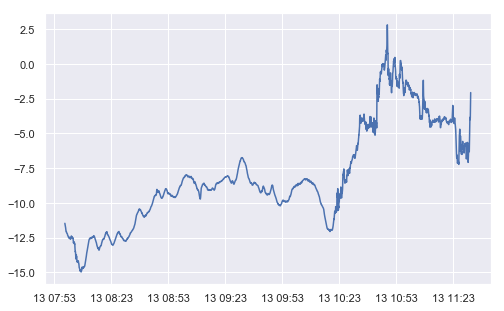

In [32]:
# plot IMF z-component against time
plt.figure(figsize=(8,5))
plt.plot(epoch3,B_vec3[:,2])

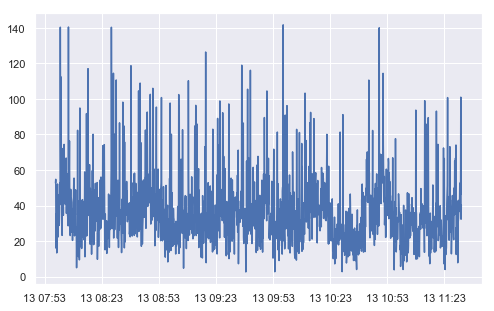

In [33]:
# plasma flow velocity from CIS
plt.figure(figsize=(8,5))
plt.plot(epoch4,vel_tot4)

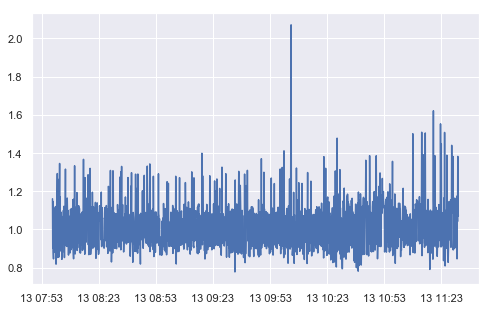

In [35]:
# cis temperature anisotropy
plt.figure(figsize=(8,5))
plt.plot(epoch4,T_par4/T_perp4)

In [34]:
cdf5 = pycdf.CDF('/Users/mayur/PhD/Magnetotail_Project/Data/C4_CP_PEA_MOMENTS__20031013_075830_20031013_113207_V140315')
#/disk/user1/mrb2/Cluster_data/... if on linux
for (i, item) in enumerate(cdf5, start=0):
    print(i, item, cdf5[i])

0 time_tags__C4_CP_PEA_MOMENTS CDF_EPOCH [865]
1 time_tags_DeltaLower__C4_CP_PEA_MOMENTS CDF_FLOAT [865]
2 time_tags_DeltaUpper__C4_CP_PEA_MOMENTS CDF_FLOAT [865]
3 Mode_Sensor__C4_CP_PEA_MOMENTS CDF_INT4 [865]
4 Mode_SweepMode_HEEA__C4_CP_PEA_MOMENTS CDF_INT4 [865]
5 Mode_Preset_HEEA__C4_CP_PEA_MOMENTS CDF_INT4 [865]
6 Mode_EnergyLevelRange_HEEA__C4_CP_PEA_MOMENTS CDF_INT4 [865, 2]
7 Mode_EnergyMaxMin_HEEA__C4_CP_PEA_MOMENTS CDF_FLOAT [865, 2]
8 Mode_MCPlevel_HEEA__C4_CP_PEA_MOMENTS CDF_INT4 [865]
9 Mode_DataOrigin_HEEA__C4_CP_PEA_MOMENTS CDF_INT4 [865]
10 Mode_SweepMode_LEEA__C4_CP_PEA_MOMENTS CDF_INT4 [865]
11 Mode_Preset_LEEA__C4_CP_PEA_MOMENTS CDF_INT4 [865]
12 Mode_EnergyLevelRange_LEEA__C4_CP_PEA_MOMENTS CDF_INT4 [865, 2]
13 Mode_EnergyMaxMin_LEEA__C4_CP_PEA_MOMENTS CDF_FLOAT [865, 2]
14 Mode_MCPlevel_LEEA__C4_CP_PEA_MOMENTS CDF_INT4 [865]
15 Mode_DataOrigin_LEEA__C4_CP_PEA_MOMENTS CDF_INT4 [865]
16 Mode_TopRegionSensor__C4_CP_PEA_MOMENTS CDF_INT4 [865]
17 Mode_OverlapRegionSens

In [36]:
epoch5 = cdf5[0][...]
density5 = cdf5[19][...] #cm-3
vel5 = cdf5[20][...] #km/s
pressure5 = cdf5[23][...] #nPa
heat_flux5 = cdf5[24][...] #microW/m^2
T_par5 = cdf5[25][...] #MK
T_perp5 = cdf5[26][...] #MK

Text(0,0.5,'Electron density/cm-3')

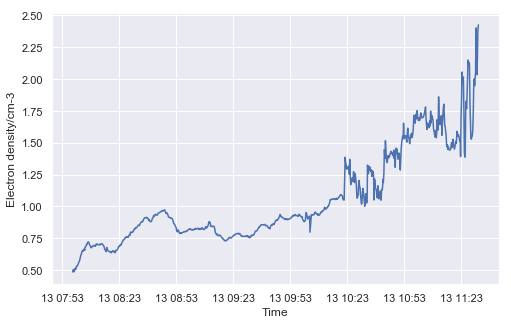

In [42]:
# electron density
plt.figure(figsize=(8,5))
plt.plot(epoch5,density5)
plt.xlabel('Time')
plt.ylabel('Electron density/cm-3')

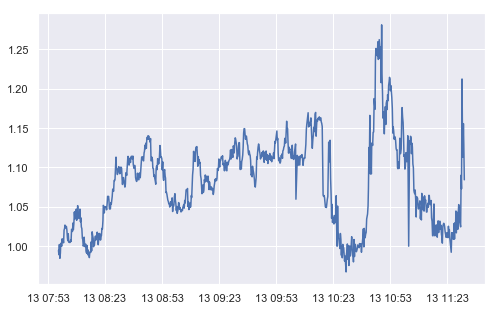

In [38]:
# electron temperature anisotropy
plt.figure(figsize=(8,5))
plt.plot(epoch5,T_par5/T_perp5)